In [1]:
# load pandas library
# load OneHotEncoder library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [3]:
# load complete movies dataset
movies_df = pd.read_csv('movies_modeling.csv')
movies_df.head()

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,imdb_score,dir_acted,...,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,non_dom_gross_usd,title_length,worldwide_roi,domestic_roi,non_dom_roi,success_level_ww
0,5,R,Drama,146.0,0,19000000,44568631,45613093,8.4,0,...,0,0,0,1,1044462,11,1.400689,1.345717,-0.945028,2
1,6,R,Adventure,104.0,1,4500000,47923795,47923795,5.8,1,...,0,0,0,1,0,15,9.649732,9.649732,-1.000000,2
2,7,PG,Comedy,88.0,1,3500000,83453539,83453539,7.7,0,...,0,0,0,0,0,9,22.843868,22.843868,-1.000000,2
3,7,R,Comedy,98.0,1,6000000,39846344,39849764,7.3,1,...,0,0,0,1,3420,10,5.641627,5.641057,-0.999430,2
4,5,R,Horror,95.0,1,550000,39754601,59754601,6.4,0,...,0,0,0,1,20000000,15,107.644729,71.281093,35.363636,2


In [4]:
# A quick preview of the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_released           3052 non-null   int64  
 1   rated                    3052 non-null   object 
 2   genre                    3052 non-null   object 
 3   runtime_minutes          3052 non-null   float64
 4   belongs_to_collection    3052 non-null   int64  
 5   production_budget_usd    3052 non-null   int64  
 6   domestic_gross_usd       3052 non-null   int64  
 7   worldwide_gross_usd      3052 non-null   int64  
 8   imdb_score               3052 non-null   float64
 9   dir_acted                3052 non-null   int64  
 10  dir_animation_dept       3052 non-null   int64  
 11  dir_art_dept             3052 non-null   int64  
 12  dir_art_dir              3052 non-null   int64  
 13  dir_assistant_dir        3052 non-null   int64  
 14  dir_camera_dept         

# Part 1: Rating and genre values
There are two main categorical columns: rated (the rating of the movie) and genre (the genre of the movie). It would be best to see the distribution of values in order to see if some repeat a lot or are not present at all.


Let's start with the rating:

In [5]:
# First we create a series including only the values of "rated"
rating = movies_df[["rated"]]

''

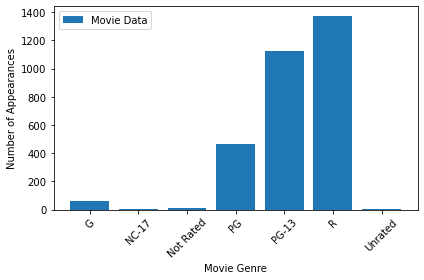

In [6]:
# A quick bar plot to see the total amount a specific rating appears
rating_counts = rating["rated"].value_counts().sort_index()
 
fig, ax = plt.subplots()
ax.bar(rating_counts.index, rating_counts.values)
ax.set_xlabel("Movie Genre")
ax.set_ylabel("Number of Appearances")
ax.legend(["Movie Data"])
plt.xticks(rotation=45)
plt.tight_layout()
;

In [7]:
# Now a value count to see the precentage of times a specific rating happens
rating["rated"].value_counts(normalize = True) * 100

R            44.986894
PG-13        36.959371
PG           15.301442
G             1.998689
Not Rated     0.425950
Unrated       0.196592
NC-17         0.131062
Name: rated, dtype: float64

We can see that apart from **R**, **PG-13**, and **PG**, the rest of the ratings combined appear less than 3% of the time. One way to deal with this could be to drop them from the analysis. Another one would be to join them all in one category called "Other". Dropping them is easy, so in case it is needed, I will join them all into "Other" and perform the analysis. If in the end it doesn't work, we can always drop everything and follow the same process.


I will drop them in the original data frame

In [8]:
to_replace = ["G", "Not Rated","Unrated", "NC-17", "TV-MA"]
movies_df[["rated"]] = movies_df[["rated"]].replace(to_replace,"Other")

In [9]:
movies_df

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,imdb_score,dir_acted,...,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,non_dom_gross_usd,title_length,worldwide_roi,domestic_roi,non_dom_roi,success_level_ww
0,5,R,Drama,146.0,0,19000000,44568631,45613093,8.4,0,...,0,0,0,1,1044462,11,1.400689,1.345717,-0.945028,2
1,6,R,Adventure,104.0,1,4500000,47923795,47923795,5.8,1,...,0,0,0,1,0,15,9.649732,9.649732,-1.000000,2
2,7,PG,Comedy,88.0,1,3500000,83453539,83453539,7.7,0,...,0,0,0,0,0,9,22.843868,22.843868,-1.000000,2
3,7,R,Comedy,98.0,1,6000000,39846344,39849764,7.3,1,...,0,0,0,1,3420,10,5.641627,5.641057,-0.999430,2
4,5,R,Horror,95.0,1,550000,39754601,59754601,6.4,0,...,0,0,0,1,20000000,15,107.644729,71.281093,35.363636,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,5,PG,Animation,91.0,1,22000000,20738724,35609577,4.3,0,...,0,0,0,1,14870853,35,0.618617,-0.057331,-0.324052,1
3048,3,PG,Biography,105.0,0,10000000,1279681,7582196,6.1,0,...,0,0,0,1,6302515,9,-0.241780,-0.872032,-0.369749,0
3049,6,PG,Animation,89.0,0,38000000,73921000,126422949,6.2,1,...,0,0,0,1,52501949,40,2.326920,0.945289,0.381630,2
3050,7,PG-13,Drama,90.0,0,12000000,14301505,23477345,5.0,0,...,0,0,0,0,9175840,9,0.956445,0.191792,-0.235347,1


''

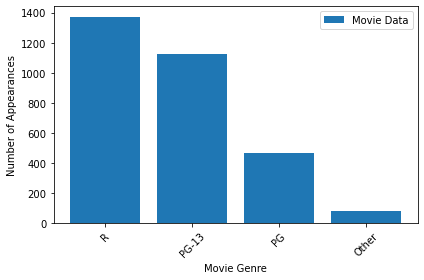

In [10]:
# A quick bar plot again
new_counts = movies_df["rated"].value_counts().sort_index(ascending = False)

fig, ax = plt.subplots()
ax.bar(new_counts.index, new_counts.values)
ax.set_xlabel("Movie Genre")
ax.set_ylabel("Number of Appearances")
ax.legend(["Movie Data"])
plt.xticks(rotation=45)
plt.tight_layout()
;

In [11]:
# We see the difference in the values as well
movies_df["rated"].value_counts(normalize = True) * 100

R        44.986894
PG-13    36.959371
PG       15.301442
Other     2.752294
Name: rated, dtype: float64

Now that rating is "clean", we can start working on the other categorical column **genre**:

In [12]:
# First we create a series including only the values of "genre"
genre = movies_df[["genre"]]

''

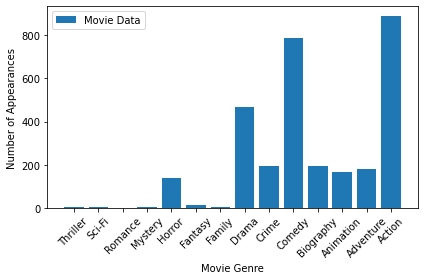

In [13]:
# Bar plot to see the amount of times a certain genre appears
genre_counts = genre["genre"].value_counts().sort_index(ascending = False)

fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_xlabel("Movie Genre")
ax.set_ylabel("Number of Appearances")
ax.legend(["Movie Data"])
plt.xticks(rotation=45)
plt.tight_layout()
;

In [14]:
# Now a value count to see the total percentage of times a specific genre happens
genre["genre"].value_counts(normalize = True) * 100

Action       29.128440
Comedy       25.753604
Drama        15.268676
Biography     6.389253
Crime         6.323722
Adventure     5.963303
Animation     5.504587
Horror        4.554391
Fantasy       0.458716
Mystery       0.196592
Thriller      0.131062
Family        0.131062
Sci-Fi        0.131062
Romance       0.065531
Name: genre, dtype: float64

Here there are multiple genres that appear at least 4% of the time. We can drop the rest of them or join them in "Other" like we did previously. To maintain the integrity I will join them and perform the analysis this way, we can always drop them in case they aren't useful.


Again, I will replace it in the original data frame

In [15]:
to_replace_genre = ["Fantasy", "Mystery","Family", "Sci-Fi", "Thriller", "Romance"]
movies_df[["genre"]] = movies_df[["genre"]].replace(to_replace_genre,"Other")

In [16]:
movies_df

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,domestic_gross_usd,worldwide_gross_usd,imdb_score,dir_acted,...,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,non_dom_gross_usd,title_length,worldwide_roi,domestic_roi,non_dom_roi,success_level_ww
0,5,R,Drama,146.0,0,19000000,44568631,45613093,8.4,0,...,0,0,0,1,1044462,11,1.400689,1.345717,-0.945028,2
1,6,R,Adventure,104.0,1,4500000,47923795,47923795,5.8,1,...,0,0,0,1,0,15,9.649732,9.649732,-1.000000,2
2,7,PG,Comedy,88.0,1,3500000,83453539,83453539,7.7,0,...,0,0,0,0,0,9,22.843868,22.843868,-1.000000,2
3,7,R,Comedy,98.0,1,6000000,39846344,39849764,7.3,1,...,0,0,0,1,3420,10,5.641627,5.641057,-0.999430,2
4,5,R,Horror,95.0,1,550000,39754601,59754601,6.4,0,...,0,0,0,1,20000000,15,107.644729,71.281093,35.363636,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,5,PG,Animation,91.0,1,22000000,20738724,35609577,4.3,0,...,0,0,0,1,14870853,35,0.618617,-0.057331,-0.324052,1
3048,3,PG,Biography,105.0,0,10000000,1279681,7582196,6.1,0,...,0,0,0,1,6302515,9,-0.241780,-0.872032,-0.369749,0
3049,6,PG,Animation,89.0,0,38000000,73921000,126422949,6.2,1,...,0,0,0,1,52501949,40,2.326920,0.945289,0.381630,2
3050,7,PG-13,Drama,90.0,0,12000000,14301505,23477345,5.0,0,...,0,0,0,0,9175840,9,0.956445,0.191792,-0.235347,1


''

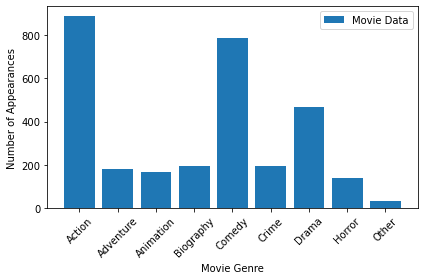

In [17]:
# A quick bar plot again
new_counts_genre = movies_df["genre"].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(new_counts_genre.index, new_counts_genre.values)
ax.set_xlabel("Movie Genre")
ax.set_ylabel("Number of Appearances")
ax.legend(["Movie Data"])
plt.xticks(rotation=45)
plt.tight_layout()
;

In [18]:
# We see the difference in the values as well
movies_df["genre"].value_counts(normalize = True) * 100

Action       29.128440
Comedy       25.753604
Drama        15.268676
Biography     6.389253
Crime         6.323722
Adventure     5.963303
Animation     5.504587
Horror        4.554391
Other         1.114024
Name: genre, dtype: float64

## Take into consideration
The "Other" rating and the "Other" genre are refering to different things.
The "Other" rating is only 2.8% of the total and the "Other" genre" is only 1.1% of the total, this can cause some trouble when doing the train test split because it is so small. The event that only one of the splits gets all of the cases.

_____
_____

# Part 2: Dropping "helping" columns
The model aims to predict the worldwide gross revenue. In the real world, movies wouldn't have information about the revenue before being launched, so every column referring to domestic and non-domestic revenue data must be dropped, as well as the columns referring to ROI and the success level. The imdb score will be dropped too because the movie can only be scored after it releases.


In addition to this, these kinf of columns can **help** the model in its job of predicting the worldwide gross revenue, this is the main reason we have to take it out, so the model actually "tries".

In [20]:
print(movies_df.columns)

Index(['month_released', 'rated', 'genre', 'runtime_minutes',
       'belongs_to_collection', 'production_budget_usd', 'domestic_gross_usd',
       'worldwide_gross_usd', 'imdb_score', 'dir_acted', 'dir_animation_dept',
       'dir_art_dept', 'dir_art_dir', 'dir_assistant_dir', 'dir_camera_dept',
       'dir_casting_dept', 'dir_casting_dir', 'dir_cinematographer',
       'dir_composer', 'dir_costume_designer', 'dir_editor',
       'dir_editorial_dept', 'dir_location_management', 'dir_makeup_dept',
       'dir_music_artist', 'dir_music_dept', 'dir_producer',
       'dir_production_designer', 'dir_production_manager', 'dir_script_dept',
       'dir_sound_dept', 'dir_soundtrack', 'dir_special_effects', 'dir_stunts',
       'dir_visual_effects', 'dir_writer', 'non_dom_gross_usd', 'title_length',
       'worldwide_roi', 'domestic_roi', 'non_dom_roi', 'success_level_ww'],
      dtype='object')


In [21]:
# Drop revenue-related and roi-related columns
to_drop_columns = ["imdb_score","domestic_gross_usd", "non_dom_gross_usd", "worldwide_roi", "domestic_roi", "non_dom_roi", "success_level_ww"]
new_df = movies_df.drop(to_drop_columns, axis = 1)

In [22]:
print(new_df.columns)

Index(['month_released', 'rated', 'genre', 'runtime_minutes',
       'belongs_to_collection', 'production_budget_usd', 'worldwide_gross_usd',
       'dir_acted', 'dir_animation_dept', 'dir_art_dept', 'dir_art_dir',
       'dir_assistant_dir', 'dir_camera_dept', 'dir_casting_dept',
       'dir_casting_dir', 'dir_cinematographer', 'dir_composer',
       'dir_costume_designer', 'dir_editor', 'dir_editorial_dept',
       'dir_location_management', 'dir_makeup_dept', 'dir_music_artist',
       'dir_music_dept', 'dir_producer', 'dir_production_designer',
       'dir_production_manager', 'dir_script_dept', 'dir_sound_dept',
       'dir_soundtrack', 'dir_special_effects', 'dir_stunts',
       'dir_visual_effects', 'dir_writer', 'title_length'],
      dtype='object')


# Part 3: train_test_split
Before performing any more cleaning steps into the data, we have to split it into the training set and the testing set to avoid data leakage.

In [23]:
from sklearn.model_selection import train_test_split

We want to predict the worldwide gross revenue, so we will make that our target variable.

In [24]:
X = new_df.drop("worldwide_gross_usd", axis = 1)
y = new_df[["worldwide_gross_usd"]]

The split will be 70/30, with a specified random_state to ensure reproducibility.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 37)

We reset the index in both sets so we don't have any problem with the rest of the processes.

In [26]:
X_train.reset_index(drop = True, inplace = True)
X_train

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,...,dir_production_designer,dir_production_manager,dir_script_dept,dir_sound_dept,dir_soundtrack,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,title_length
0,5,PG-13,Action,139.0,1,258000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12
1,6,R,Drama,122.0,0,16000000,1,0,0,0,...,0,0,0,0,1,0,0,0,0,12
2,11,PG-13,Action,104.0,0,85000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
3,8,PG-13,Adventure,84.0,0,13000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
4,9,R,Action,115.0,0,20000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,10,R,Comedy,105.0,0,65000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,13
2132,2,R,Action,104.0,0,50000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,11
2133,10,Other,Adventure,73.0,0,17000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,36
2134,12,PG,Biography,131.0,0,22000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,11


In [27]:
X_test.reset_index(drop = True, inplace = True)
X_test

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,...,dir_production_designer,dir_production_manager,dir_script_dept,dir_sound_dept,dir_soundtrack,dir_special_effects,dir_stunts,dir_visual_effects,dir_writer,title_length
0,5,PG-13,Action,126.0,0,95000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17
1,2,PG-13,Action,106.0,0,50000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,9,PG-13,Adventure,144.0,0,108000000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11
3,8,PG-13,Comedy,104.0,0,17000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12
4,11,PG-13,Biography,163.0,0,25000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,8,R,Action,104.0,1,7000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9
912,8,PG,Comedy,77.0,0,22000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,15
913,12,PG,Adventure,108.0,1,110000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,19
914,7,R,Action,118.0,0,30000000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,20


In [28]:
y_train.reset_index(drop = True, inplace = True)

In [29]:
y_test.reset_index(drop = True, inplace = True)

Getting some info in our splits.

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_released           2136 non-null   int64  
 1   rated                    2136 non-null   object 
 2   genre                    2136 non-null   object 
 3   runtime_minutes          2136 non-null   float64
 4   belongs_to_collection    2136 non-null   int64  
 5   production_budget_usd    2136 non-null   int64  
 6   dir_acted                2136 non-null   int64  
 7   dir_animation_dept       2136 non-null   int64  
 8   dir_art_dept             2136 non-null   int64  
 9   dir_art_dir              2136 non-null   int64  
 10  dir_assistant_dir        2136 non-null   int64  
 11  dir_camera_dept          2136 non-null   int64  
 12  dir_casting_dept         2136 non-null   int64  
 13  dir_casting_dir          2136 non-null   int64  
 14  dir_cinematographer     

In [31]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_released           916 non-null    int64  
 1   rated                    916 non-null    object 
 2   genre                    916 non-null    object 
 3   runtime_minutes          916 non-null    float64
 4   belongs_to_collection    916 non-null    int64  
 5   production_budget_usd    916 non-null    int64  
 6   dir_acted                916 non-null    int64  
 7   dir_animation_dept       916 non-null    int64  
 8   dir_art_dept             916 non-null    int64  
 9   dir_art_dir              916 non-null    int64  
 10  dir_assistant_dir        916 non-null    int64  
 11  dir_camera_dept          916 non-null    int64  
 12  dir_casting_dept         916 non-null    int64  
 13  dir_casting_dir          916 non-null    int64  
 14  dir_cinematographer      9

# Part 4: OneHotEncoding
Now that the data has been splitted, we can proceed to the next step: OneHotEncoding it so that the model can fully intepret it.

OneHotEncoding must be perfomerd in both the training data and the testing data. First it will be performed in the training data.

In [32]:
# OneHotEncode the rating of the movie

# Start the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_rating = X_train[['rated']].copy() 

# Fit the Encoder to the data frame
ohe.fit(movie_rating)  

# Convert the results to a data frame and make the column names have the rating they are representing.
movie_rating_ohe = pd.DataFrame(
     data=ohe.transform(movie_rating),
     columns=[f"rating_{rating}" for rating in ohe.categories_[0]])  

movie_rating_ohe

,rating_Other,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
2131,0.0,0.0,0.0,1.0
2132,0.0,0.0,0.0,1.0
2133,1.0,0.0,0.0,0.0
2134,0.0,1.0,0.0,0.0


In [33]:
# OneHotEncode the genre of the movie.

# Initializing the Encoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_genre = X_train[['genre']].copy() 

# Fit the encoder to the dataframe
ohe.fit(movie_genre)  

# Convert the results to a data frame and make the column names have the genres they are representing.
movie_genre_ohe = pd.DataFrame(
     data=ohe.transform(movie_genre),
     columns=[f"genre_{genre}" for genre in ohe.categories_[0]])

movie_genre_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2131,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2132,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2133,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2134,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Now that we have the OneHotEncoded data frames, it is time to join them with the original testing one.

In [34]:
X_train_ohe = pd.concat([X_train, movie_rating_ohe, movie_genre_ohe], axis=1)
X_train_ohe.head()

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,5,PG-13,Action,139.0,1,258000000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,R,Drama,122.0,0,16000000,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,PG-13,Action,104.0,0,85000000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,PG-13,Adventure,84.0,0,13000000,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,R,Action,115.0,0,20000000,1,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Drop the "rated" and "genre" columns because we no longer need them.

In [35]:
X_train_ohe.drop(['rated', 'genre'], axis=1, inplace=True)
X_train_ohe.head()

,month_released,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,dir_assistant_dir,dir_camera_dept,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,5,139.0,1,258000000,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,122.0,0,16000000,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,11,104.0,0,85000000,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,84.0,0,13000000,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,115.0,0,20000000,1,0,0,0,0,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The training data has been OneHotEncoded, now we need to the the same with our testing data.

In [36]:
# OneHotEncode the rating of the movie in the testing data.

# Start the OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_rating = X_test[['rated']].copy() 

# Fit the Encoder to the data frame
ohe.fit(movie_rating)  

# Convert the results to a data frame and make the column names have the rating they are representing.
movie_rating_ohe = pd.DataFrame(
     data=ohe.transform(movie_rating),
     columns=[f"rating_{rating}" for rating in ohe.categories_[0]])  

movie_rating_ohe

,rating_Other,rating_PG,rating_PG-13,rating_R
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
911,0.0,0.0,0.0,1.0
912,0.0,1.0,0.0,0.0
913,0.0,1.0,0.0,0.0
914,0.0,0.0,0.0,1.0


In [37]:
# OneHotEncode the genre of the movie in the testing data.

# Initializing the Encoder
ohe = OneHotEncoder(sparse=False)

# Make a copy of the dataset to avoid any data leakage and maintain integrity.
movie_genre = X_test[['genre']].copy() 

# Fit the encoder to the dataframe
ohe.fit(movie_genre)  

# Convert the results to a data frame and make the column names have the genres they are representing.
movie_genre_ohe = pd.DataFrame(
     data=ohe.transform(movie_genre),
     columns=[f"genre_{genre}" for genre in ohe.categories_[0]])

movie_genre_ohe

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
912,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
913,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We again concatenate the OneHotEncoded dataframes with the original testing dataframe.

In [38]:
X_test_ohe = pd.concat([X_test, movie_rating_ohe, movie_genre_ohe], axis=1)
X_test_ohe.head()

,month_released,rated,genre,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,5,PG-13,Action,126.0,0,95000000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,PG-13,Action,106.0,0,50000000,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,PG-13,Adventure,144.0,0,108000000,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,PG-13,Comedy,104.0,0,17000000,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11,PG-13,Biography,163.0,0,25000000,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Drop the "rated" and "genre" columns because we no longer need them.

In [39]:
X_test_ohe.drop(['rated', 'genre'], axis=1, inplace=True)
X_test_ohe.head()

,month_released,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,dir_assistant_dir,dir_camera_dept,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,5,126.0,0,95000000,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,106.0,0,50000000,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9,144.0,0,108000000,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,104.0,0,17000000,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,11,163.0,0,25000000,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


Let's have a quick view of the train and test data frames.

In [40]:
X_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_released           2136 non-null   int64  
 1   runtime_minutes          2136 non-null   float64
 2   belongs_to_collection    2136 non-null   int64  
 3   production_budget_usd    2136 non-null   int64  
 4   dir_acted                2136 non-null   int64  
 5   dir_animation_dept       2136 non-null   int64  
 6   dir_art_dept             2136 non-null   int64  
 7   dir_art_dir              2136 non-null   int64  
 8   dir_assistant_dir        2136 non-null   int64  
 9   dir_camera_dept          2136 non-null   int64  
 10  dir_casting_dept         2136 non-null   int64  
 11  dir_casting_dir          2136 non-null   int64  
 12  dir_cinematographer      2136 non-null   int64  
 13  dir_composer             2136 non-null   int64  
 14  dir_costume_designer    

In [41]:
X_test_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   month_released           916 non-null    int64  
 1   runtime_minutes          916 non-null    float64
 2   belongs_to_collection    916 non-null    int64  
 3   production_budget_usd    916 non-null    int64  
 4   dir_acted                916 non-null    int64  
 5   dir_animation_dept       916 non-null    int64  
 6   dir_art_dept             916 non-null    int64  
 7   dir_art_dir              916 non-null    int64  
 8   dir_assistant_dir        916 non-null    int64  
 9   dir_camera_dept          916 non-null    int64  
 10  dir_casting_dept         916 non-null    int64  
 11  dir_casting_dir          916 non-null    int64  
 12  dir_cinematographer      916 non-null    int64  
 13  dir_composer             916 non-null    int64  
 14  dir_costume_designer     9

# Part 5.5: Scaling
Because the production budget is in the order of millions, scaling the data is recommended to maintain integrity.

A standard scaler will be used.

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train_ohe)
X_test_scaled = scaler.transform(X_test_ohe)

Transform the arrays to a data frame

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_ohe.columns, index=X_train_ohe.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_ohe.columns, index=X_test_ohe.index)

In [46]:
X_train_scaled

,month_released,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,dir_assistant_dir,dir_camera_dept,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,-0.670991,1.581717,1.818365,4.778327,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
1,-0.371526,0.667346,-0.549945,-0.608254,1.659504,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,-0.648967,-0.241813,-0.240727,-0.261791,-0.596817,-0.264840,2.440831,-0.21693,-0.113147
2,1.125795,-0.300812,-0.549945,0.927589,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
3,0.227402,-1.376543,-0.549945,-0.675030,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,4.135420,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
4,0.526867,0.290840,-0.549945,-0.519219,1.659504,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,0.826331,-0.247025,-0.549945,0.482417,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,-0.648967,-0.241813,-0.240727,-0.261791,1.675556,-0.264840,-0.409697,-0.21693,-0.113147
2132,-1.569384,-0.300812,-0.549945,0.148538,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
2133,0.826331,-1.968195,-0.549945,-0.585995,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,4.135420,-0.240727,-0.261791,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147
2134,1.425260,1.151425,-0.549945,-0.474702,1.659504,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,-0.241813,-0.240727,3.819848,-0.596817,-0.264840,-0.409697,-0.21693,-0.113147


In [47]:
X_test_scaled

,month_released,runtime_minutes,belongs_to_collection,production_budget_usd,dir_acted,dir_animation_dept,dir_art_dept,dir_art_dir,dir_assistant_dir,dir_camera_dept,...,rating_R,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Other
0,-0.670991,0.882492,-0.549945,1.150175,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
1,-1.569384,-0.193239,-0.549945,0.148538,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
2,0.526867,1.850650,-0.549945,1.439537,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,4.135420,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
3,0.227402,-0.300812,-0.549945,-0.585995,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,-0.241813,-0.240727,-0.261791,1.675556,-0.26484,-0.409697,-0.21693,-0.113147
4,1.125795,2.872595,-0.549945,-0.407926,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,-0.241813,-0.240727,3.819848,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,0.227402,-0.300812,1.818365,-0.808581,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
912,0.227402,-1.753049,-0.549945,-0.474702,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,-0.241813,-0.240727,-0.261791,1.675556,-0.26484,-0.409697,-0.21693,-0.113147
913,1.425260,-0.085666,1.818365,1.484054,1.659504,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,-0.912949,-0.648967,4.135420,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147
914,-0.072062,0.452200,-0.549945,-0.296633,-0.602590,-0.132768,-0.102014,-0.037503,-0.18944,-0.115251,...,1.095351,1.540911,-0.241813,-0.240727,-0.261791,-0.596817,-0.26484,-0.409697,-0.21693,-0.113147


# Part 6: Building the model
We have the data splitted, OneHotEncoded, and scaled, now we can perform some modeling to obtain results.

Lets a multiple linear regression model.

In [48]:
import statsmodels.api as sm

Use StatsModels to get information about the regression like the t-values and adjusted R-squared.

In [49]:
model = sm.OLS(y_train, sm.add_constant(X_train_scaled))

In [50]:
results = model.fit()
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     worldwide_gross_usd   R-squared:                       0.573
Model:                             OLS   Adj. R-squared:                  0.565
Method:                  Least Squares   F-statistic:                     70.41
Date:                 Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                         16:21:30   Log-Likelihood:                -42928.
No. Observations:                 2136   AIC:                         8.594e+04
Df Residuals:                     2095   BIC:                         8.617e+04
Df Model:                           40                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

The model has an adjusted R-squared of 0.577, not bad for a first trial

Show the graphs of all the partial regressions that constitute the complete multiple linear regression.

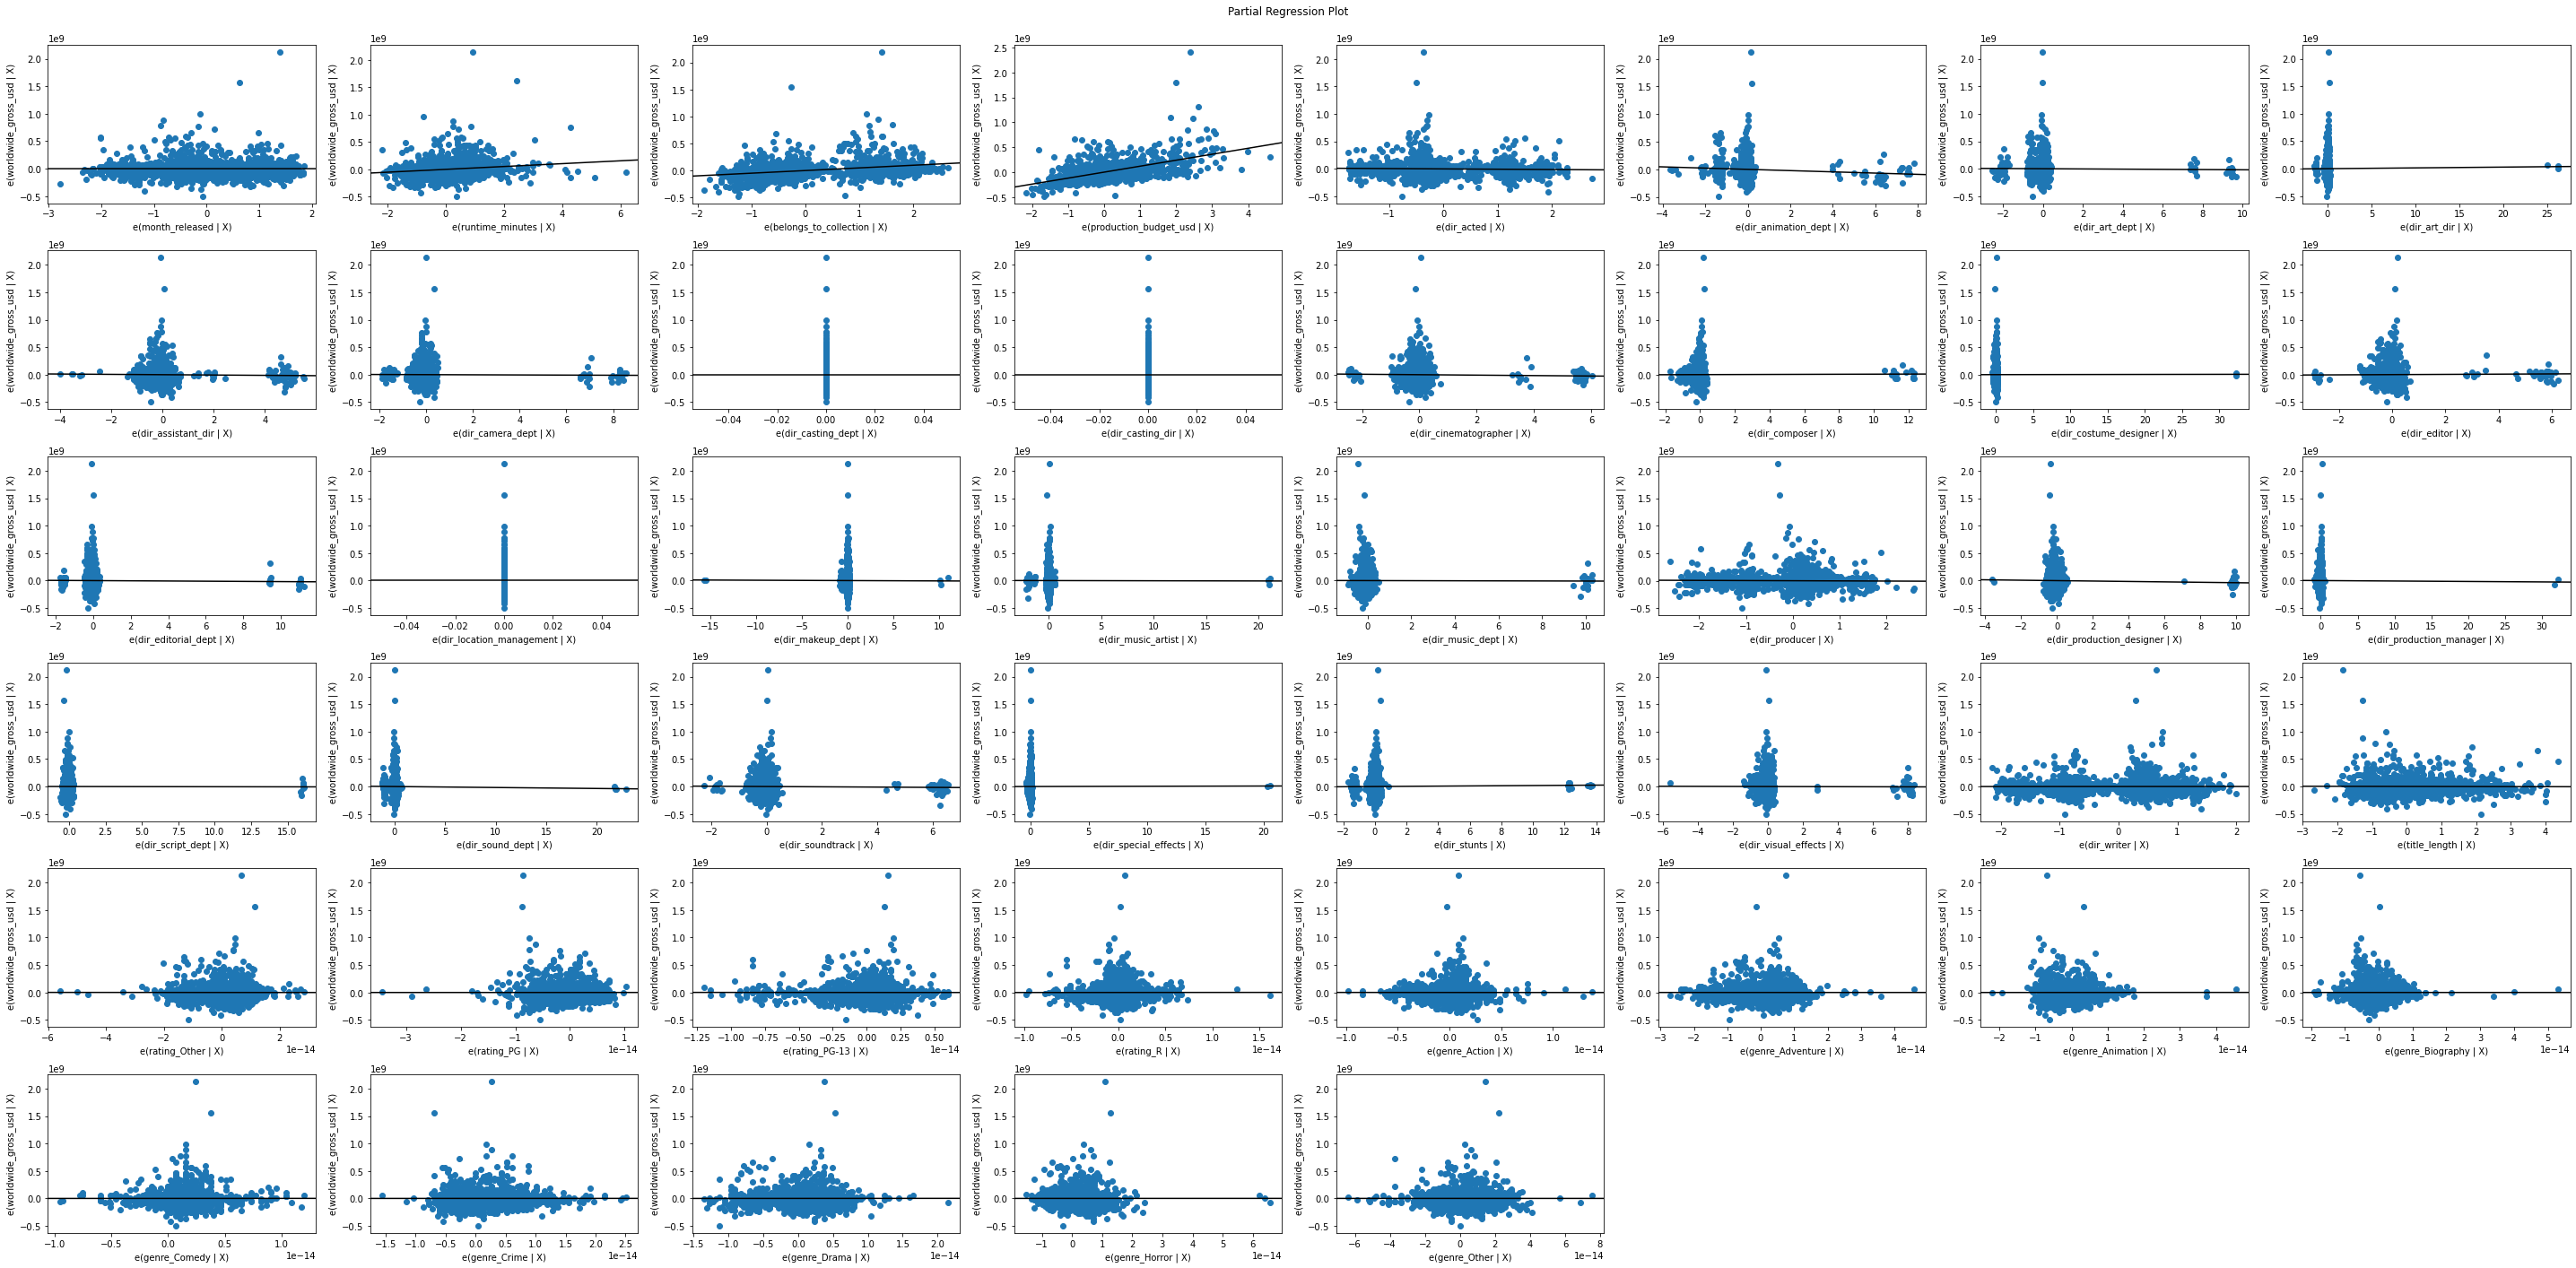

''

In [51]:
# Plots of the partial regressions

fig = plt.figure(figsize = (40,20))
sm.graphics.plot_partregress_grid(results, exog_idx=list(X_train_scaled.columns.values), grid = (6,8), fig =fig)
plt.show()

;

Now we'll use scikit-learn to calculate a new model and see the error metrics

In [52]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [53]:
model_sci = LinearRegression()

In [54]:
model_sci.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
y_pred = model_sci.predict(X_test_scaled)

In [56]:
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  8.171963438604023e+32
mean_absolute_error :  944531657730003.1
